## Comic Characters
### Comic Characters Dataset

#### Content
The dataset includes comic characters in Marvel Wikia and DC Wikia

The dataset is prepared by Bojan Tunguz

Here is the dataset link : https://www.kaggle.com/tunguz/comic-characters

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of  Columns in Both Dataframe</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Starting page_id from zero in both dataframes </a></li>
      <li><a href="#part3-2">3.2 Redefining urlslug in both dataframes </a></li>
      <li><a href="#part3-3">3.3 Redefining FIRST APPEARANCE and create MONTH column in both dataframes </a></li>
      <li><a href="#part3-4">3.4 Redefining MONTH column in marvel dataframe </a></li>  
      <li><a href="#part3-5">3.5 Removing FIRST APPEARANCE column in both dataframes </a></li> 
      <li><a href="#part3-6">3.6 Defining show_values_on_bars function to show values on both vertical and horizontal bar</a></li>
      <li><a href="#part3-7">3.7 Converting Year column to int in each dataframe</a></li>   
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Showing a bar graphs containing the number of ID and this number by sex in both DC and Marvel Comics </a></li>
      <li><a href="#part4-2">4.2 Showing a violinplot graphs containing the number of eye,hair attributes and that values by sex in both DC and Marvel Comics</a></li>
      <li><a href="#part4-3">4.3 Showing a pie graphs containing the number of align and alive attributes and that values by sex in both DC and Marvel Comics</a></li>
      <li><a href="#part4-4">4.4 Showing a bar graphs containing the top 10 number of appearances by name in both DC and Marvel Comics </a></li>
      <li><a href="#part4-5">4.5 Showing a time graphs containing the number of comic characters firstly appeared by month and year in both DC and Marvel Comics</a></li> 
      <li><a href="#part4-6">4.6 Showing a unique names in WordCloud for both DC and Marvel Comics</a></li>  
    </ul>
  </li>
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

1 - Import libraries I used for visualization

In [569]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.express as px
import plotly.io as pio
import random
import datetime
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

2 - Define dataframes for DC and Marvel after loading all values from csv file and assigning them to it

In [570]:
file_location_url_dc = "files/dc-wikia-data.csv";
file_location_url_marvel = "files/marvel-wikia-data.csv";

dc_df = pd.read_csv(file_location_url_dc, error_bad_lines=False,encoding = "utf-8")
marvel_df = pd.read_csv(file_location_url_marvel, error_bad_lines=False,encoding = "utf-8")

3 - Deterime how many rows and columns are defined in each dataframe

In [571]:
row_count_dc = dc_df.shape[0]
column_count_dc = dc_df.shape[1]

row_count_marvel = dc_df.shape[0]
column_count_marvel = marvel_df.shape[1]

print("DC -- Row : {} , Column : {}".format(row_count_dc,column_count_dc))
print("Marvel -- Row : {} , Column : {}".format(row_count_marvel,column_count_marvel))

DC -- Row : 6896 , Column : 13
Marvel -- Row : 6896 , Column : 13


4 - Show first 5 values of each dataframe

In [572]:
dc_df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [573]:
marvel_df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


5 - Show last 5 values of each dataframe

In [574]:
dc_df.tail()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6895,150660,Mookie (New Earth),\/wiki\/Mookie_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [575]:
marvel_df.tail()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16375,673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN


6 - Show each column information of each dataframe

In [576]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [577]:
marvel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


7 - Show how many variables there are in each dataframe

In [578]:
dc_df.count()

page_id             6896
name                6896
urlslug             6896
ID                  4883
ALIGN               6295
EYE                 3268
HAIR                4622
SEX                 6771
GSM                   64
ALIVE               6893
APPEARANCES         6541
FIRST APPEARANCE    6827
YEAR                6827
dtype: int64

In [579]:
marvel_df.count()

page_id             16376
name                16376
urlslug             16376
ID                  12606
ALIGN               13564
EYE                  6609
HAIR                12112
SEX                 15522
GSM                    90
ALIVE               16373
APPEARANCES         15280
FIRST APPEARANCE    15561
Year                15561
dtype: int64

8 - Show descriptive statistics of each dataframe

In [580]:
dc_df.describe()

,page_id,APPEARANCES,YEAR
count,6896.000000,6541.000000,6827.000000
mean,147441.209252,23.625134,1989.766662
std,108388.631149,87.378509,16.824194
min,1380.000000,1.000000,1935.000000
25%,44105.500000,2.000000,1983.000000
50%,141267.000000,6.000000,1992.000000
75%,213203.000000,15.000000,2003.000000
max,404010.000000,3093.000000,2013.000000


In [581]:
marvel_df.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


9 - Determine if null values of each column are in each dataframe

In [582]:
dc_df.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [583]:
marvel_df.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

<a id='part2'></a>
## 2. Description of  Columns in Both Dataframe

In [584]:
values = [
  ['page_id', 
   'name', 
   'urlslug',
   'ID',
   'ALIGN',
   'EYE',
   'HAIR',
   'SEX',
   'GSM',
   'ALIVE',
   'APPEARANCES',
   'FIRST APPEARANCE',
   'YEAR',
  ],  #1st col
  ["The unique identifier for that characters page within the wikia", 
   "The name of the character",
   "The unique url within the wikia that takes you to the character",  
   "The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])",
   "If the character is Good, Bad or Neutral",
   "The eye color of the character",
   "The hair color of the character",
   "The sex of the character (e.g. Male, Female, etc.)",
   "If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)",
   "If the character is alive or deceased",
   "The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)",
   "The month and year of the character's first appearance in a comic book, if available",
   "The year of the character's first appearance in a comic book, if available",
  ] #2nd col
] 

layout = go.Layout(title="A Description of Columns in Both Dataframes", 
                   height=750, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [200,400],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='black',
    fill_color='steelblue',
    align=['left','center'],
    font=dict(color='white', size=16),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['deepskyblue', 'azure']),
    align=['left', 'left'],
    font_size=13,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling

<a id='part3-1'></a>
### 3.1 Starting page_id from zero in both dataframes 

In [585]:
dc_df.reset_index(inplace = True)
marvel_df.reset_index(inplace = True)

<a id='part3-2'></a>
### 3.2 Redefining urlslug in both dataframes 

1 - Remove reverse slash in urlslug column of both dataframes

In [586]:
dc_df["urlslug"] = dc_df["urlslug"].replace({r'\\':''}, regex=True)
marvel_df["urlslug"] = marvel_df["urlslug"].replace({r'\\':''}, regex=True)

2 - Add related url into the head of urlslug column of both dataframes

In [587]:
dc_df["urlslug"] = 'https://dc.fandom.com/' + dc_df["urlslug"].astype(str)
marvel_df["urlslug"] = 'https://marvel.fandom.com/wiki' + marvel_df["urlslug"].astype(str)

<a id='part3-3'></a>
### 3.3 Redefining FIRST APPEARANCE and create MONTH column in both dataframes

In [588]:
dc_df['MONTH'] = dc_df[dc_df["FIRST APPEARANCE"].notnull()]["FIRST APPEARANCE"].str.split(',').str[1]

In [589]:
marvel_df['MONTH'] = marvel_df[marvel_df["FIRST APPEARANCE"].notnull()]["FIRST APPEARANCE"].str.split('-').str[0]

<a id='part3-4'></a>
### 3.4 Redefining MONTH column in marvel dataframe

1 - Show certain values of MONTH column

In [590]:
marvel_df[marvel_df["MONTH"].notnull()]["MONTH"].unique()

array(['Aug', 'Mar', 'Oct', 'Nov', 'May', 'Sep', 'Apr', 'Jul', 'Jun',
       'Jan', 'Feb', 'Dec'], dtype=object)

2 - Implement replacement procedure

In [591]:
replacements = {'Jan':'January',
                'Feb':'Febraury',
                'Mar':'March',
                'Apr':'April',
                'May':'May',
                'Jun':'June',
                'Jul':'July',
                'Aug':'August',
                'Sep':'September',
                'Oct':'October',
                'Nov':'November',
                'Dec':'December'}

marvel_df['MONTH'] = marvel_df['MONTH'].replace(replacements)

<a id='part3-5'></a>
### 3.5 Removing FIRST APPEARANCE column in both dataframes

In [592]:
dc_df.drop("FIRST APPEARANCE", axis =1, inplace = True)
marvel_df.drop("FIRST APPEARANCE", axis =1, inplace = True)

<a id='part3-6'></a>
### 3.6 Defining show_values_on_bars function to show values on both vertical and horizontal bar

In [593]:
def show_values_on_bars(axs, h_v="v", space= 0.4):
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                value = 0
                if not np.isnan(p.get_height()):
                    value = int(p.get_height())
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + value
                ax.text(_x, _y, value, ha="center", fontsize=18) 
        elif h_v == "h":
            for p in ax.patches:                
                value = 0
                if not np.isnan(p.get_width()):
                    value = int(p.get_width())
                _x = p.get_x() + p.get_width()
                _y = p.get_y() + p.get_height() - float(space) 
                ax.text(_x, _y, value, ha="left", fontsize=18)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

<a id='part3-7'></a>
### 3.7 Converting Year column to int in each dataframe

In [594]:
dc_df['YEAR'] = dc_df['YEAR'].replace(np.nan, 0)
marvel_df['Year'] = marvel_df['Year'].replace(np.nan, 0)

dc_df["YEAR"] = dc_df['YEAR'].astype(int)
marvel_df['Year'] = marvel_df['Year'].astype(int)

<a id='part3-8'></a>
### 3.8 Defining drawnestedpiegraph function to show nested pie graph

In [595]:
def drawnestedpiegraph(outer,inner,labels,pieTitle,filename):

    fig, ax = plt.subplots(figsize=(30,15))
    size = 0.3
    
    colors_1 = random.choices(list(mcolors.CSS4_COLORS.values()),k = outer.size)
    colors_2 = random.choices(list(mcolors.CSS4_COLORS.values()),k = inner.size)

    ax.pie(outer.values.flatten(), radius=1,
           labels=outer.index,
           autopct='%1.1f%%',
           pctdistance=1.1, labeldistance=1.2,
           textprops={'fontsize': 14},
           colors = colors_1,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.pie(inner.values.flatten(), radius=1-size, 
           labels = labels,
           autopct='%1.1f%%',
           pctdistance=0.5, labeldistance=0.6,
           textprops={'fontsize': 12},
           colors = colors_2,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.set(aspect="equal")
    ax.set_title(pieTitle, fontsize = 20)
    plt.savefig('images/' + filename, bbox_inches = "tight")
    plt.show()

<a id='part4'></a>
### 4. Data Visualization

In [596]:
columns = ["ID","SEX"]
dc_df = dc_df.dropna(subset= columns, how='any')
marvel_df = marvel_df.dropna(subset= columns, how='any')                        

<a id='part4-1'></a>
### 4.1 Showing a bar graphs containing the number of ID and this number by sex in both DC and Marvel Comics 

In [597]:
dc_df_ID = pd.DataFrame({'count' : dc_df.groupby(['ID']).size()}).reset_index()
dc_df_ID = dc_df_ID.sort_values(['count'], ascending = False)
dc_df_ID

,ID,count
1,Public Identity,2438
2,Secret Identity,2381
0,Identity Unknown,9


In [598]:
marvel_df_ID = pd.DataFrame({'count' : marvel_df.groupby(['ID']).size()}).reset_index()
marvel_df_ID = marvel_df_ID.sort_values(['count'], ascending = False)
marvel_df_ID

,ID,count
3,Secret Identity,6026
2,Public Identity,4423
1,No Dual Identity,1744
0,Known to Authorities Identity,15


In [599]:
dc_df_ID_SEX = pd.DataFrame({'count' : dc_df.groupby(['ID','SEX']).size()}).reset_index()
dc_df_ID_SEX = dc_df_ID_SEX.sort_values(['count'], ascending = False)
dc_df_ID_SEX

,ID,SEX,count
6,Secret Identity,Male Characters,1751
3,Public Identity,Male Characters,1662
1,Public Identity,Female Characters,765
4,Secret Identity,Female Characters,625
2,Public Identity,Genderless Characters,11
0,Identity Unknown,Male Characters,9
5,Secret Identity,Genderless Characters,5


In [600]:
marvel_df_SEX = pd.DataFrame({'count' : marvel_df.groupby(['ID','SEX']).size()}).reset_index()
marvel_df_SEX = marvel_df_SEX.sort_values(['count'], ascending = False)
marvel_df_SEX

,ID,SEX,count
13,Secret Identity,Male Characters,4506
9,Public Identity,Male Characters,3367
11,Secret Identity,Female Characters,1505
6,No Dual Identity,Male Characters,1246
8,Public Identity,Female Characters,1051
4,No Dual Identity,Female Characters,486
10,Secret Identity,Agender Characters,14
3,No Dual Identity,Agender Characters,11
2,Known to Authorities Identity,Male Characters,9
1,Known to Authorities Identity,Female Characters,5


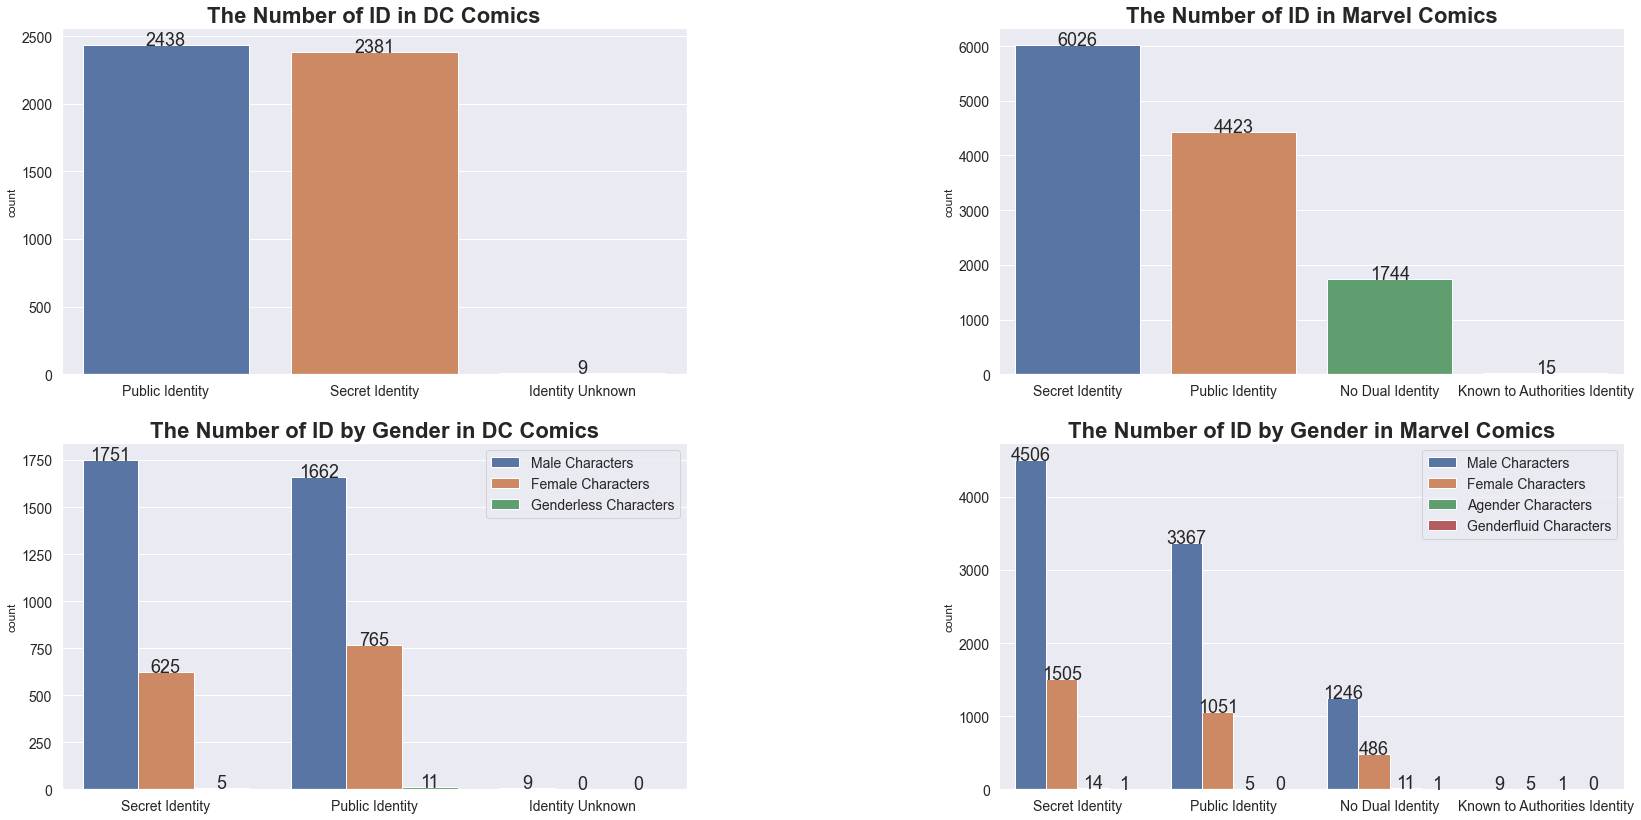

In [601]:
f,a = plt.subplots(2,2,figsize=(28,14))
f.subplots_adjust(wspace = .5)

graph_1 = sns.barplot(data = dc_df_ID, 
            x = "ID" , 
            y = "count", ax=a[0,0])

show_values_on_bars(graph_1, "v", 0.3)

a[0,0].set_title('The Number of ID in DC Comics', fontsize=22, fontweight='bold')
a[0,0].set_xlabel('')

for tick in a[0,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[0,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)    
    
graph_2 = sns.barplot(data = marvel_df_ID, 
            x = "ID" , 
            y = "count", ax=a[0,1])

show_values_on_bars(graph_2, "v", 0.3)

a[0,1].set_title('The Number of ID in Marvel Comics', fontsize=22, fontweight='bold')
a[0,1].set_xlabel('');

for tick in a[0,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[0,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 


graph_3 = sns.barplot(data = dc_df_ID_SEX, 
            x = "ID" , 
            y = "count", ax=a[1,0], hue='SEX')

show_values_on_bars(graph_3, "v", 0.3)

a[1,0].set_title('The Number of ID by Gender in DC Comics', fontsize=22, fontweight='bold')
a[1,0].set_xlabel('')

for tick in a[1,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[1,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

a[1,0].legend(loc='upper right',prop=dict(size=14))

graph_4 = sns.barplot(data = marvel_df_SEX, 
            x = "ID" ,
            y = "count", ax=a[1,1], hue='SEX')

show_values_on_bars(graph_4, "v", 0.3)

a[1,1].set_title('The Number of ID by Gender in Marvel Comics', fontsize=22, fontweight='bold')
a[1,1].set_xlabel('');

for tick in a[1,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[1,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

a[1,1].legend(loc='upper right',prop=dict(size=14))

plt.savefig('images/image2.png', bbox_inches = "tight")
plt.show()

<a id='part4-2'></a>
### 4.2 Showing a violinplot graphs containing the number of eye,hair attributes and that values by sex in both DC and Marvel Comics 

In [602]:
dc_df_EYE_SEX = pd.DataFrame({'count' : dc_df.groupby(['EYE','SEX']).size()}).reset_index()
dc_df_EYE_SEX = dc_df_EYE_SEX.sort_values(['count'], ascending = False)
dc_df_EYE_SEX

,EYE,SEX,count
8,Blue Eyes,Male Characters,615
11,Brown Eyes,Male Characters,482
7,Blue Eyes,Female Characters,325
6,Black Eyes,Male Characters,289
9,Brown Eyes,Female Characters,240
14,Green Eyes,Female Characters,133
32,Red Eyes,Male Characters,131
16,Green Eyes,Male Characters,103
4,Black Eyes,Female Characters,80
36,White Eyes,Male Characters,74


In [603]:
marvel_df_EYE_SEX = pd.DataFrame({'count' : marvel_df.groupby(['EYE','SEX']).size()}).reset_index()
marvel_df_EYE_SEX = marvel_df_EYE_SEX.sort_values(['count'], ascending = False)
marvel_df_EYE_SEX

,EYE,SEX,count
13,Brown Eyes,Male Characters,1221
9,Blue Eyes,Male Characters,1166
8,Blue Eyes,Female Characters,616
11,Brown Eyes,Female Characters,465
6,Black Eyes,Male Characters,339
19,Green Eyes,Male Characters,308
41,Red Eyes,Male Characters,308
51,White Eyes,Male Characters,259
17,Green Eyes,Female Characters,242
56,Yellow Eyes,Male Characters,146


In [604]:
dc_df_HAIR_SEX = pd.DataFrame({'count' : dc_df.groupby(['HAIR','SEX']).size()}).reset_index()
dc_df_HAIR_SEX = dc_df_HAIR_SEX.sort_values(['count'], ascending = False)
dc_df_HAIR_SEX

,HAIR,SEX,count
2,Black Hair,Male Characters,839
9,Brown Hair,Male Characters,592
0,Black Hair,Female Characters,386
4,Blond Hair,Male Characters,340
8,Brown Hair,Female Characters,245
3,Blond Hair,Female Characters,229
34,White Hair,Male Characters,208
23,Red Hair,Female Characters,186
24,Red Hair,Male Characters,168
14,Grey Hair,Male Characters,99


In [605]:
marvel_df_HAIR_SEX = pd.DataFrame({'count' : marvel_df.groupby(['HAIR','SEX']).size()}).reset_index()
marvel_df_HAIR_SEX = marvel_df_HAIR_SEX.sort_values(['count'], ascending = False)
marvel_df_HAIR_SEX

,HAIR,SEX,count
7,Black Hair,Male Characters,2252
15,Brown Hair,Male Characters,1530
5,Black Hair,Female Characters,892
9,Blond Hair,Male Characters,715
29,No Hair,Male Characters,707
4,Bald,Male Characters,664
8,Blond Hair,Female Characters,590
48,White Hair,Male Characters,521
13,Brown Hair,Female Characters,440
23,Grey Hair,Male Characters,370


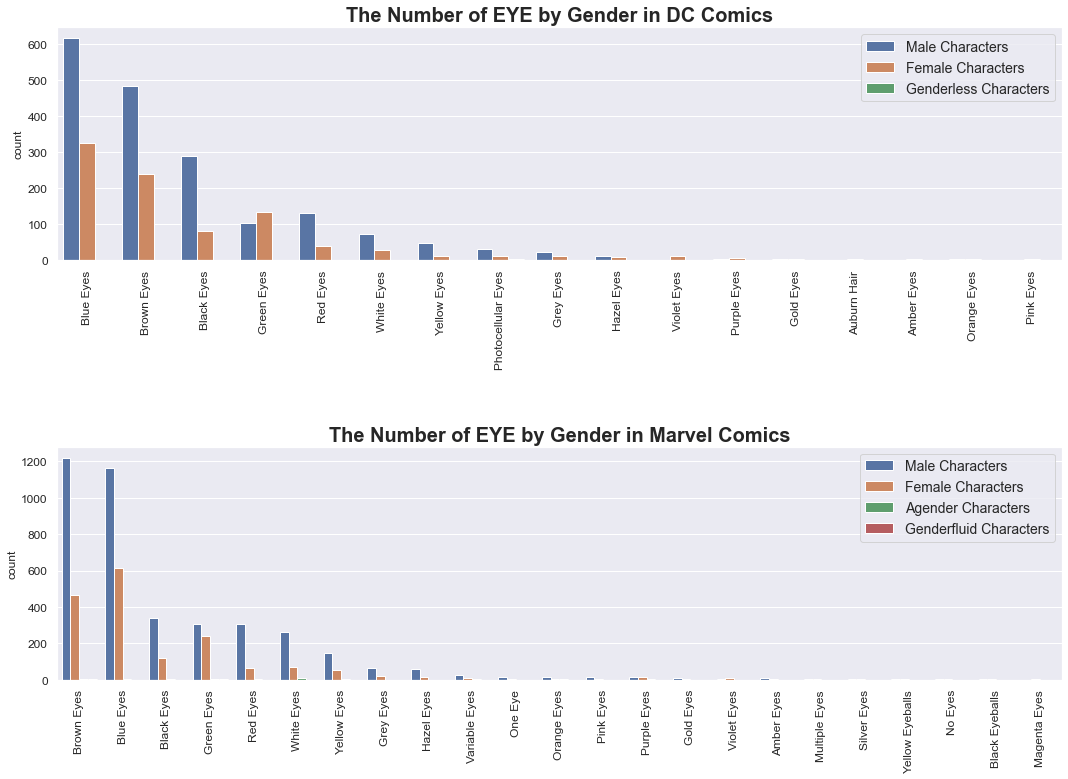

In [606]:
f,a = plt.subplots(2,1,figsize=(18,12))
f.subplots_adjust(wspace = .8, hspace = .8)

graph_1 = sns.barplot(data = dc_df_EYE_SEX, 
            x = "EYE" , 
            y = "count", ax=a[0], hue='SEX')
a[0].set_title('The Number of EYE by Gender in DC Comics', fontsize=20, fontweight='bold')
a[0].set_xlabel('')

for tick in a[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
for tick in a[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
       
a[0].legend(loc='upper right',prop=dict(size=14))     
a[0].tick_params(axis='x', rotation=90)    
    
    
graph_2 = sns.barplot(data = marvel_df_EYE_SEX, 
            x = "EYE" , 
            y = "count", ax=a[1], hue='SEX')
a[1].set_title('The Number of EYE by Gender in Marvel Comics', fontsize=20, fontweight='bold')
a[1].set_xlabel('');

for tick in a[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

for tick in a[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

a[1].legend(loc='upper right',prop=dict(size=14))
a[1].tick_params(axis='x', rotation=90) 

plt.savefig('images/image3.png', bbox_inches = "tight")
plt.show()

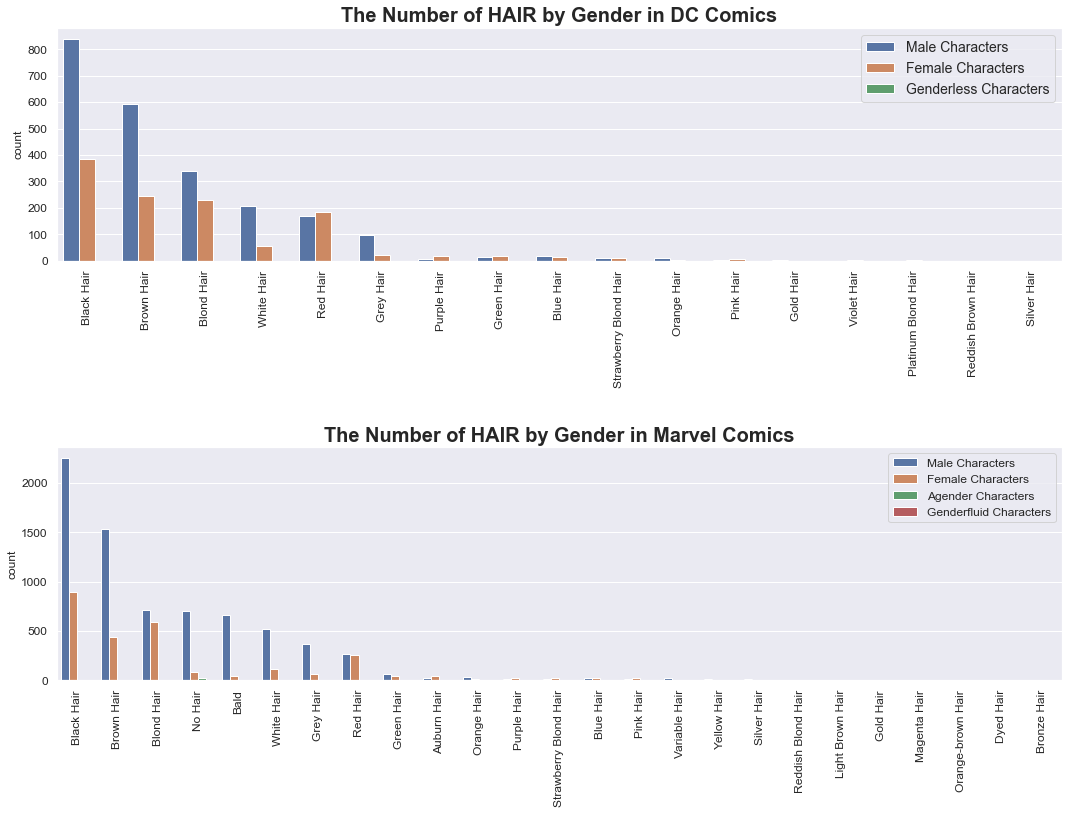

In [607]:
f,a = plt.subplots(2,1,figsize=(18,12))
f.subplots_adjust(wspace = .8, hspace = .8)

graph_1 = sns.barplot(data = dc_df_HAIR_SEX, 
            x = "HAIR" , 
            y = "count", ax=a[0], hue='SEX')
a[0].set_title('The Number of HAIR by Gender in DC Comics', fontsize=20, fontweight='bold')
a[0].set_xlabel('')

for tick in a[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
for tick in a[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
       
a[0].legend(loc='upper right',prop=dict(size=14))     
a[0].tick_params(axis='x', rotation=90)    
    
    
graph_2 = sns.barplot(data = marvel_df_HAIR_SEX, 
            x = "HAIR" ,
            y = "count", ax=a[1], hue='SEX')
a[1].set_title('The Number of HAIR by Gender in Marvel Comics', fontsize=20, fontweight='bold')
a[1].set_xlabel('');

for tick in a[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

for tick in a[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

a[1].legend(loc='upper right',prop=dict(size=12))
a[1].tick_params(axis='x', rotation=90) 

plt.savefig('images/image4.png', bbox_inches = "tight")
plt.show()

<a id='part4-3'></a>
### 4.3 Showing a pie graphs containing the number of align and alive attributes and that values by sex in both DC and Marvel Comics 

In [608]:
dc_df_ALIGN_SEX = pd.DataFrame({'count' : dc_df.groupby(['ALIGN','SEX']).size()}).reset_index()
dc_df_ALIGN_SEX = dc_df_ALIGN_SEX.sort_values(['count'], ascending = False)

dc_df_ALIGN_SEX_outer = dc_df_ALIGN_SEX.groupby('SEX').sum()
dc_df_ALIGN_SEX_inner = dc_df_ALIGN_SEX.groupby(['SEX', 'ALIGN']).sum()
dc_df_ALIGN_SEX_inner_labels = dc_df_ALIGN_SEX_inner.index.get_level_values(1)

In [609]:
marvel_df_ALIGN_SEX = pd.DataFrame({'count' : marvel_df.groupby(['ALIGN','SEX']).size()}).reset_index()
marvel_df_ALIGN_SEX = marvel_df_ALIGN_SEX.sort_values(['count'], ascending = False)

marvel_df_ALIGN_SEX_outer = marvel_df_ALIGN_SEX.groupby('SEX').sum()
marvel_df_ALIGN_SEX_inner = marvel_df_ALIGN_SEX.groupby(['SEX', 'ALIGN']).sum()
marvel_df_ALIGN_SEX_inner_labels = marvel_df_ALIGN_SEX_inner.index.get_level_values(1)

In [610]:
dc_df_ALIVE_SEX = pd.DataFrame({'count' : dc_df.groupby(['ALIVE','SEX']).size()}).reset_index()
dc_df_ALIVE_SEX = dc_df_ALIVE_SEX.sort_values(['count'], ascending = False)

dc_df_ALIVE_SEX_outer = dc_df_ALIVE_SEX.groupby('SEX').sum()
dc_df_ALIVE_SEX_inner = dc_df_ALIVE_SEX.groupby(['SEX', 'ALIVE']).sum()
dc_df_ALIVE_SEX_inner_labels = dc_df_ALIVE_SEX_inner.index.get_level_values(1)

In [611]:
marvel_df_ALIVE_SEX = pd.DataFrame({'count' : marvel_df.groupby(['ALIVE','SEX']).size()}).reset_index()
marvel_df_ALIVE_SEX = marvel_df_ALIVE_SEX.sort_values(['count'], ascending = False)

marvel_df_ALIVE_SEX_outer = marvel_df_ALIVE_SEX.groupby('SEX').sum()
marvel_df_ALIVE_SEX_inner = marvel_df_ALIVE_SEX.groupby(['SEX', 'ALIVE']).sum()
marvel_df_ALIVE_SEX_inner_labels = marvel_df_ALIVE_SEX_inner.index.get_level_values(1)

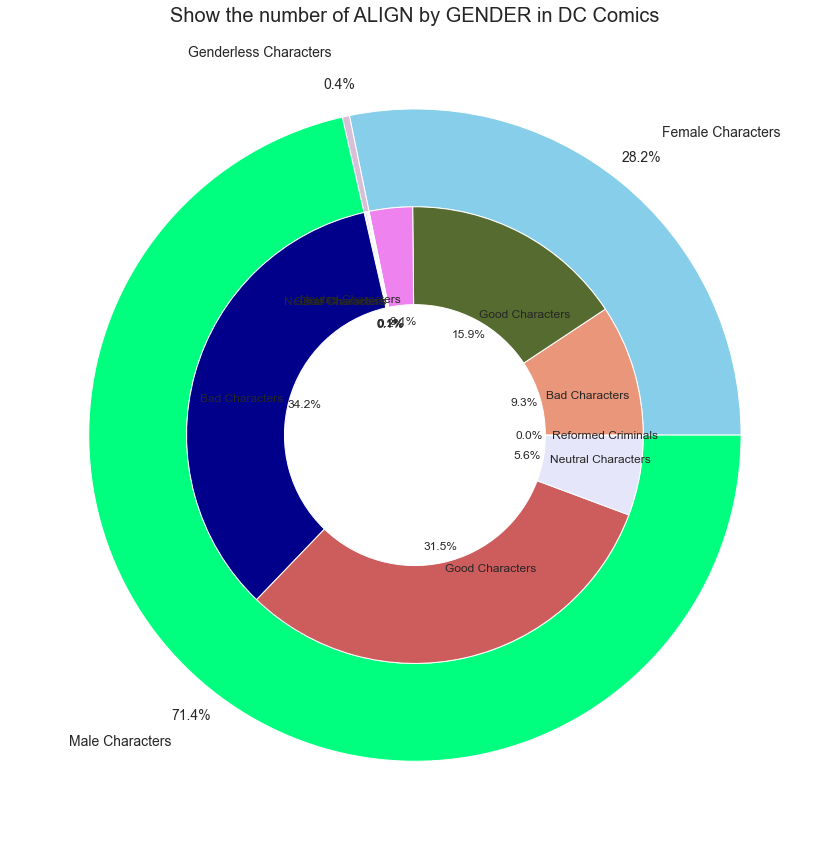

In [612]:
drawnestedpiegraph(dc_df_ALIGN_SEX_outer,
                   dc_df_ALIGN_SEX_inner,
                   dc_df_ALIGN_SEX_inner_labels,
                   "Show the number of ALIGN by GENDER in DC Comics",
                   "image5.png")

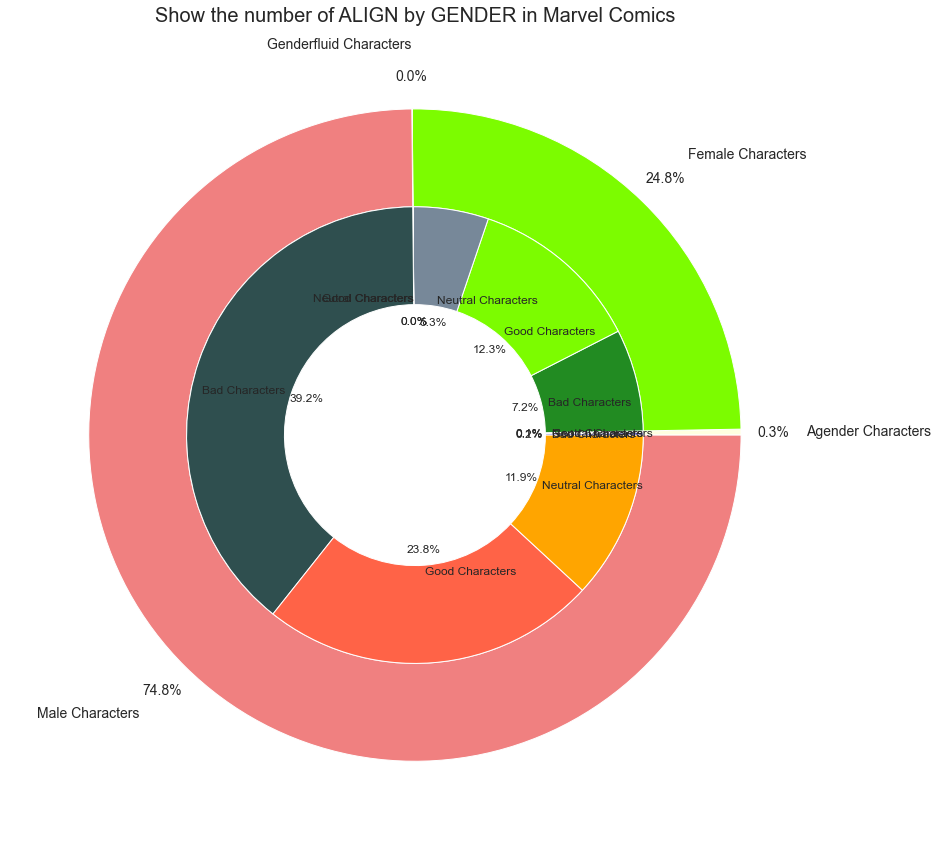

In [613]:
drawnestedpiegraph(marvel_df_ALIGN_SEX_outer,
                   marvel_df_ALIGN_SEX_inner,
                   marvel_df_ALIGN_SEX_inner_labels,
                   "Show the number of ALIGN by GENDER in Marvel Comics",
                   "image6.png")

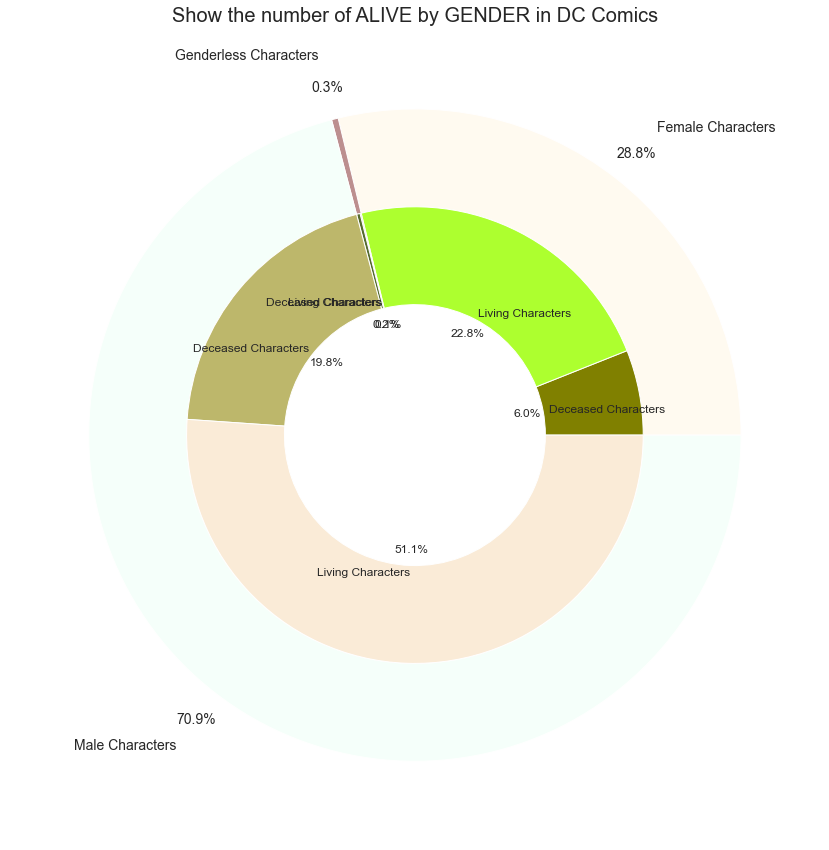

In [614]:
drawnestedpiegraph(dc_df_ALIVE_SEX_outer,
                   dc_df_ALIVE_SEX_inner,
                   dc_df_ALIVE_SEX_inner_labels,
                   "Show the number of ALIVE by GENDER in DC Comics",
                   "image7.png")

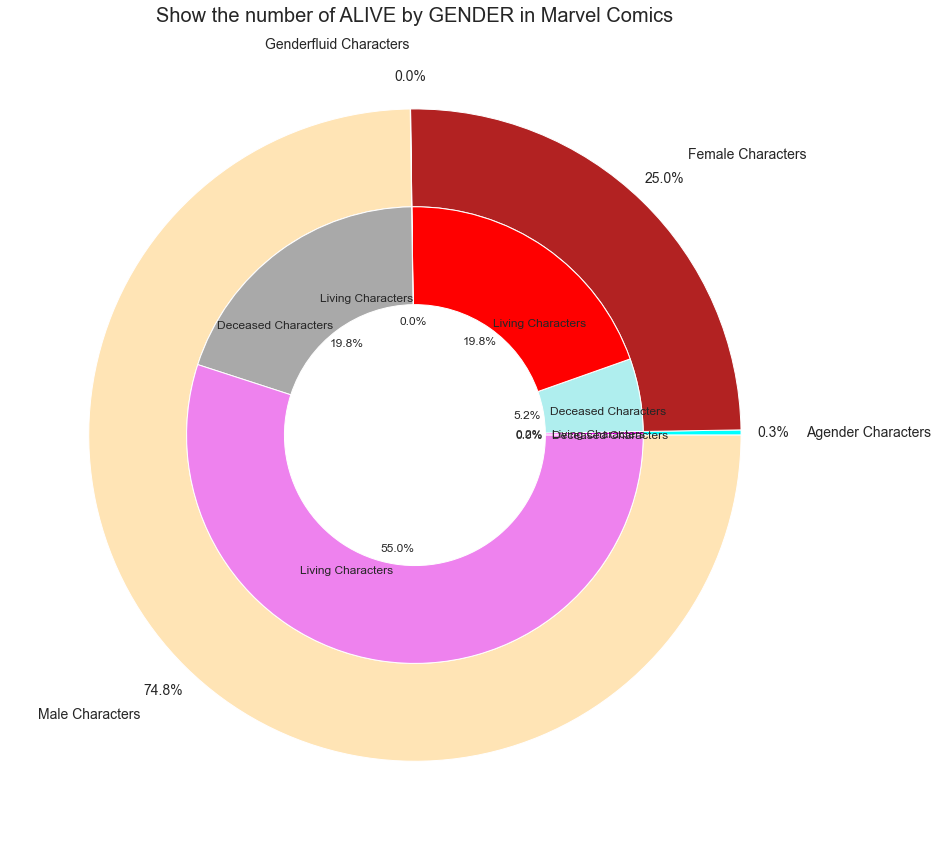

In [615]:
drawnestedpiegraph(marvel_df_ALIVE_SEX_outer,
                   marvel_df_ALIVE_SEX_inner,
                   marvel_df_ALIVE_SEX_inner_labels,
                   "Show the number of ALIVE by GENDER in Marvel Comics",
                   "image8.png")

<a id='part4-4'></a>
### 4.4 Showing a bar graphs containing the top 10 number of appearances by name in both DC and Marvel Comics 

In [616]:
dc_df_top_10_appearance = dc_df.sort_values(['APPEARANCES'], ascending = False)
dc_df_top_10_appearance = dc_df_top_10_appearance.head(10)
dc_df_top_10_appearance

,index,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,MONTH
0,0,1422,Batman (Bruce Wayne),https://dc.fandom.com//wiki/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,1939,May
1,1,23387,Superman (Clark Kent),https://dc.fandom.com//wiki/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,1986,October
2,2,1458,Green Lantern (Hal Jordan),https://dc.fandom.com//wiki/Green_Lantern_(Hal...,Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,1959,October
3,3,1659,James Gordon (New Earth),https://dc.fandom.com//wiki/James_Gordon_(New_...,Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,1987,February
4,4,1576,Richard Grayson (New Earth),https://dc.fandom.com//wiki/Richard_Grayson_(N...,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,1940,April
5,5,1448,Wonder Woman (Diana Prince),https://dc.fandom.com//wiki/Wonder_Woman_(Dian...,Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,1231.0,1941,December
6,6,1486,Aquaman (Arthur Curry),https://dc.fandom.com//wiki/Aquaman_(Arthur_Cu...,Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1121.0,1941,November
7,7,1451,Timothy Drake (New Earth),https://dc.fandom.com//wiki/Timothy_Drake_(New...,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1095.0,1989,August
8,8,71760,Dinah Laurel Lance (New Earth),https://dc.fandom.com//wiki/Dinah_Laurel_Lance...,Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,1075.0,1969,November
9,9,1380,Flash (Barry Allen),https://dc.fandom.com//wiki/Flash_(Barry_Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1028.0,1956,October


In [617]:
marvel_df_top_10_appearance = marvel_df.sort_values(['APPEARANCES'], ascending = False)
marvel_df_top_10_appearance = marvel_df_top_10_appearance.head(10)
marvel_df_top_10_appearance

,index,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,Year,MONTH
0,0,1678,Spider-Man (Peter Parker),https://marvel.fandom.com/wiki/Spider-Man_(Pet...,Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,1962,August
1,1,7139,Captain America (Steven Rogers),https://marvel.fandom.com/wiki/Captain_America...,Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,1941,March
2,2,64786,"Wolverine (James \""Logan\"" Howlett)",https://marvel.fandom.com/wiki/Wolverine_(Jame...,Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,1974,October
3,3,1868,"Iron Man (Anthony \""Tony\"" Stark)",https://marvel.fandom.com/wiki/Iron_Man_(Antho...,Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,1963,March
4,4,2460,Thor (Thor Odinson),https://marvel.fandom.com/wiki/Thor_(Thor_Odin...,No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,1950,November
5,5,2458,Benjamin Grimm (Earth-616),https://marvel.fandom.com/wiki/Benjamin_Grimm_...,Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,1961,November
6,6,2166,Reed Richards (Earth-616),https://marvel.fandom.com/wiki/Reed_Richards_(...,Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,1961,November
7,7,1833,Hulk (Robert Bruce Banner),https://marvel.fandom.com/wiki/Hulk_(Robert_Br...,Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,1962,May
8,8,29481,Scott Summers (Earth-616),https://marvel.fandom.com/wiki/Scott_Summers_(...,Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,1963,September
9,9,1837,Jonathan Storm (Earth-616),https://marvel.fandom.com/wiki/Jonathan_Storm_...,Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,1961,November


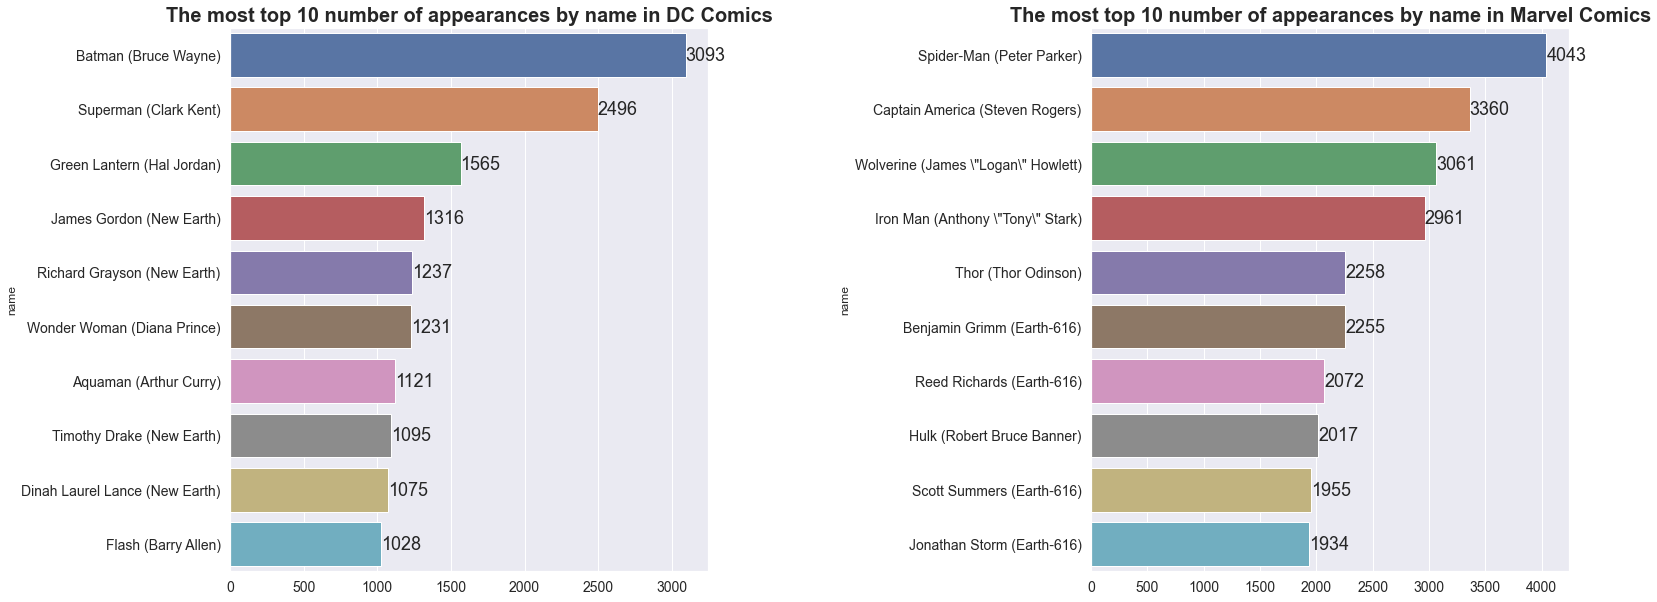

In [618]:
f,a = plt.subplots(1,2,figsize=(24,10))
f.subplots_adjust(wspace = .8)

graph_1 = sns.barplot(data = dc_df_top_10_appearance, 
            x = "APPEARANCES" , 
            y = "name", ax=a[0])

show_values_on_bars(graph_1, "h", 0.3)

a[0].set_title('The most top 10 number of appearances by name in DC Comics', fontsize=20, fontweight='bold')
a[0].set_xlabel('')

for tick in a[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

graph_2 = sns.barplot(data = marvel_df_top_10_appearance, 
            x = "APPEARANCES" , 
            y = "name", ax=a[1])

show_values_on_bars(graph_2, "h", 0.3)

a[1].set_title('The most top 10 number of appearances by name in Marvel Comics', fontsize=20, fontweight='bold')
a[1].set_xlabel('');

for tick in a[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

plt.savefig('images/image9.png', bbox_inches = "tight")
plt.show()

<a id='part4-5'></a>
### 4.5 Showing a time graphs containing the number of comic characters firstly appeared by month and year in both DC and Marvel Comics 

In [619]:
dc_df['MONTH'].unique()

array([' May', ' October', ' February', ' April', ' December',
       ' November', ' August', ' July', ' January', ' June', ' March',
       ' September', nan, ' Holiday'], dtype=object)

In [620]:
marvel_df['MONTH'].unique()

array(['August', 'March', 'October', 'November', 'May', 'September', nan,
       'April', 'July', 'June', 'January', 'Febraury', 'December'],
      dtype=object)

In [621]:
dc_df['MONTH'] = dc_df['MONTH'].str.strip()
marvel_df['MONTH'] = marvel_df['MONTH'].str.strip()

In [622]:
dc_df = dc_df[dc_df["YEAR"] != 0]
marvel_df = marvel_df[marvel_df["Year"] != 0]

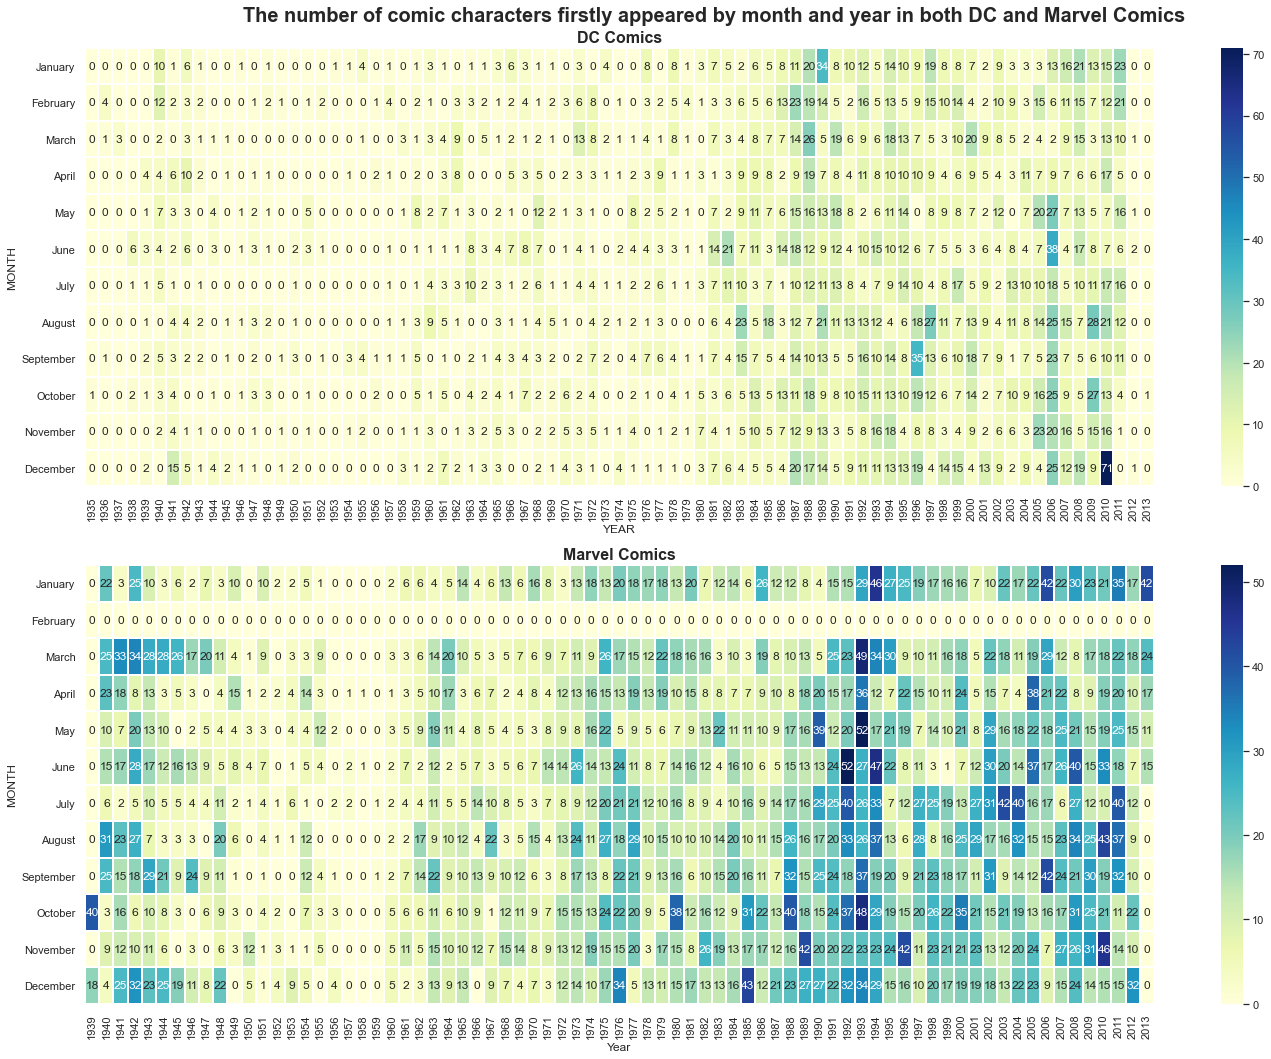

In [623]:
plt.figure(figsize=(20,15))

dc_df['MONTH'] = pd.Categorical(dc_df['MONTH'], 
                                categories=['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                ordered=True)


marvel_df['MONTH'] = pd.Categorical(marvel_df['MONTH'], 
                                    categories=['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                    ordered=True)

ax1 = plt.subplot(2, 1, 1)
dc_df_timeline = dc_df.groupby(["YEAR", "MONTH"])["index"].size().reset_index()
dc_df_timeline = dc_df_timeline.pivot("MONTH", "YEAR", "index")
sns.heatmap(dc_df_timeline, cmap="YlGnBu", linewidths=1 ,xticklabels=True, yticklabels=True,annot = True)
ax1.set_title("DC Comics", fontsize = 16,fontweight="semibold")

ax2 = plt.subplot(2, 1, 2)
marvel_df_timeline = marvel_df.groupby(["Year", "MONTH"])["index"].size().reset_index()
marvel_df_timeline = marvel_df_timeline.pivot("MONTH", "Year", "index")
sns.heatmap(marvel_df_timeline, cmap="YlGnBu", linewidths=1 ,xticklabels=True, yticklabels=True,annot = True)
ax2.set_title("Marvel Comics", fontsize = 16,fontweight="semibold")

plt.suptitle('The number of comic characters firstly appeared by month and year in both DC and Marvel Comics', 
             fontsize=20, 
             fontweight="semibold",
            )
plt.savefig('images/image10.png', bbox_inches = "tight")
plt.subplots_adjust(wspace = 2)
plt.tight_layout()
plt.show()

<a id='part4-6'></a>
### 4.6 Showing a unique names in WordCloud for  both DC and Marvel Comics 

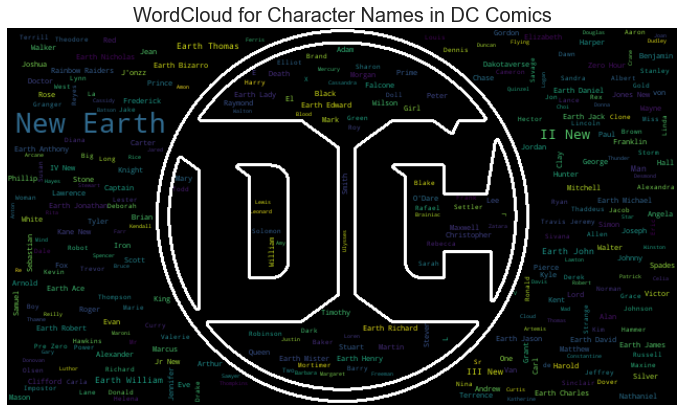

In [624]:
plt.figure(figsize=[12, 12])

image = Image.open("images/dc_icon.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(dc_df['name'].unique()))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Character Names in DC Comics', fontsize=20)
plt.savefig('images/image11.png')
plt.show()

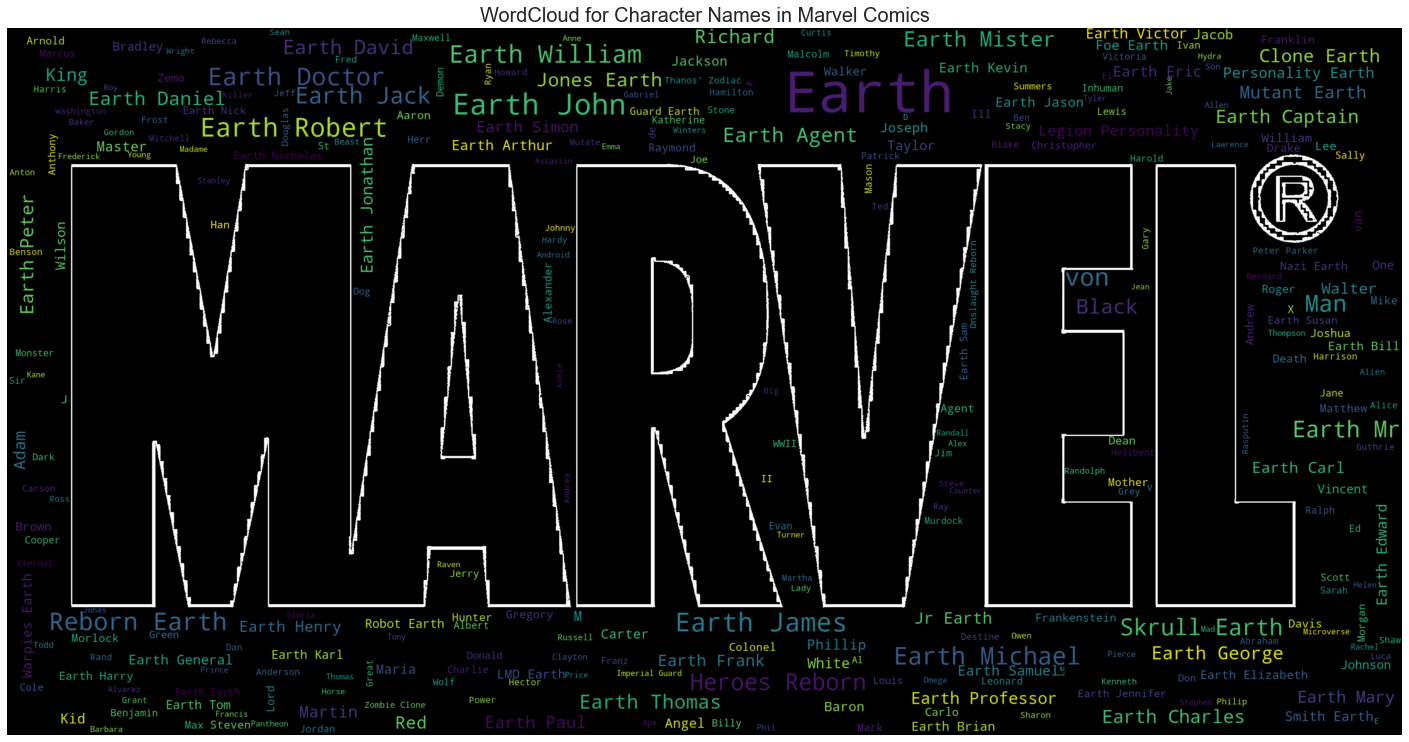

In [625]:
plt.figure(figsize=[25, 25])

image = Image.open("images/marvel_icon.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(marvel_df['name'].unique()))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Character Names in Marvel Comics', fontsize=20)
plt.savefig('images/image12.png')
plt.show()